## Assignment A3a: Signals and Noise

#### John Mays, (jkm100)

In [1]:
# Some important imports
import math
import numpy as np
import matplotlib.pyplot as plt
import sys

purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

In [2]:
sys.path.insert(1, '/Users/johnmays/Documents/GitHub/CSDS_364_HW/A1')
# import A1b_code
from A1b_code import *

### 1. Continuous signals and sampling

### 1a. Sampled functions

In [3]:
def plot_sampled_function(g=sinewave, fs=1, f=1.0, tlim=(0, 2*math.pi), tscale=1, tunits="secs"):
    # all values are given in seconds; the time scale will alter the plot to show x-axis values on the order of the tscale
    t = np.linspace(tlim[0], tlim[1], 2001)
    signal = g(t=t, f=f)
    sampled_t = np.linspace(tlim[0], tlim[1], int(((tlim[1]-tlim[0])*fs)+1))
    sampled_signal = g(t=sampled_t, f=f)
    plt.figure(figsize=(8, 5), dpi=72)
    plt.plot(t*tscale, signal, c=purples[6], label="signal")
    markers, stems, base = plt.stem(sampled_t*tscale, sampled_signal, linefmt=purples[2], basefmt=" ", label="sampled signal")
    plt.setp(markers, 'color', purples[2])
    plt.setp(markers, 'marker', 'o')
    plt.xlim(tlim[0]*tscale, tlim[1]*tscale)
    plt.xlabel("Time ({units})".format(units=tunits))
    plt.ylabel("Amplitude")
    plt.title("Sampled Signal with Original Signal")
    plt.legend()
    plt.show()
    return None

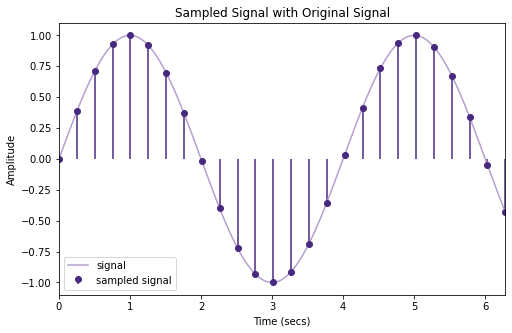

In [4]:
plot_sampled_function(g=sinewave, f= 0.25, fs=4.0)

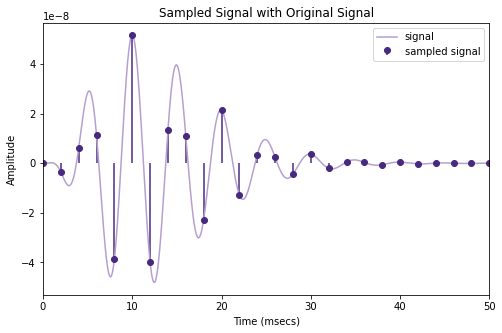

In [5]:
plot_sampled_function(g=gammatone, f=200, fs=500, tlim=(0,0.05), tscale=10**3, tunits="msecs")

### 1b. The Nyquist frequency and aliasing

##### 1. A sine wave below Nyquist at a frequency that shows a few samples per period which unevenly distributed.

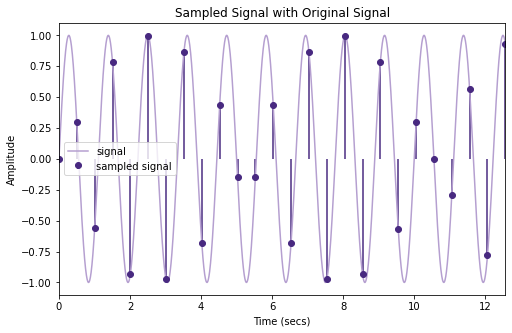

In [6]:
plot_sampled_function(g=sinewave, f= 0.9, fs=2.0, tlim=(0, 4*math.pi))

##### 2. sine at Nyquist

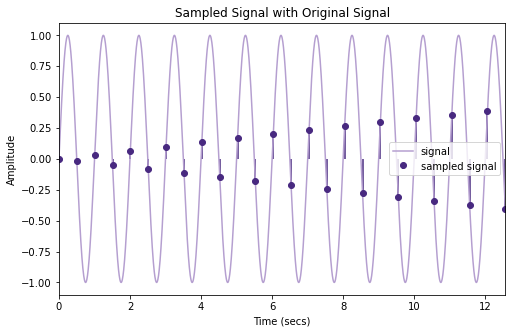

In [7]:
plot_sampled_function(g=sinewave, f= 1.0, fs=2.0, tlim=(0, 4*math.pi))

##### 3. cosine at Nyquist

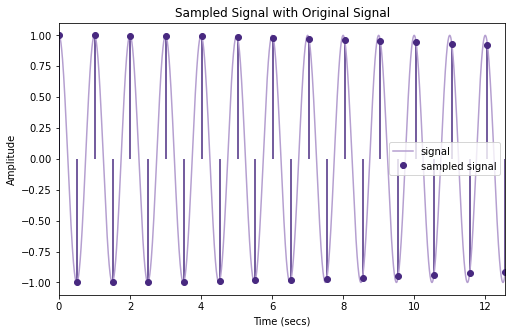

In [8]:
plot_sampled_function(g=cosinewave, f= 1.0, fs=2.0, tlim=(0, 4*math.pi))

##### 4. cosine sampled above Nyquist frequency that clearly shows aliasing

What does it mean to sample just above the Nyquist frequency if the Nyquist frequency is solely determined by the sampling frequency?  I am going to assume it was meant that the frequency of the actual wave should be just above the Nyquist frequency.

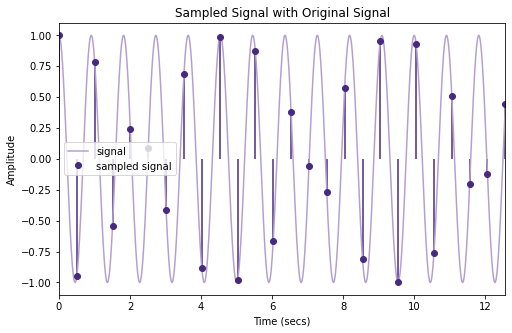

In [9]:
plot_sampled_function(g=cosinewave, f= 1.1, fs=2.0, tlim=(0, 4*math.pi))

### 2. Signals

### 2a. Delta and step functions

In [10]:
def delta(t, fs=1):
    center_time_val = 0
    signal = []
    for time_val in t:
        if (time_val >= center_time_val - 1/(2*fs)) and (time_val < center_time_val + 1/(2*fs)):
            signal.append(1)
        else:
            signal.append(0)
    return signal

In [34]:
def u(t):
    if type(t) == np.ndarray or type(t) == list:
        signal = []
        for time_val in t:
            if time_val >= 0:
                signal.append(1)
            else:
                signal.append(0)
        return signal
    else:  # t must be a number then
        if t >= 0:
            return 1
        else:
            return 0


### 2b. `gensignal`

In [12]:
def gensignal(t, g, tau=0.025, T=0.1):
    signal = g(t-tau)
    for i in range(len(signal)):
        if t[i] < tau or t[i] >= tau + T:
            signal[i] = 0
    return np.array(signal)

Example from the instructions:

In [13]:
t = np.linspace(0, 4, 5)
print(t)
signal = gensignal(t, lambda t: u(t), tau=0, T=2)
print(signal)

[0. 1. 2. 3. 4.]
[1 1 0 0 0]


### 3. Noise and SNR


### 3a. `energy`, `power`, and `snr`

In [14]:
def energy(x):
    return np.linalg.norm(x, ord=2)**2

In [15]:
def power(x):
    return energy(x)/len(x)

In [16]:
def snr(Ps, Pn):
    return 10*np.log10(Ps/Pn)

### 3b. Noisy signals

In [17]:
# for single time values t

def noisysignal(t, g, tau=0.025, T=0.1, sigma=1):
    noise_val = np.random.normal(loc=0, scale=sigma)
    if t < tau or t >= tau + T:
        return noise_val
    else:
        return noise_val + g(t)

In [18]:
print(noisysignal(1, g = lambda t: sinewave(t, f=2.0), tau = 0.25, T=1))

-1.2797114679735946


In [39]:
def plotsignal(g=lambda t: noisysignal(1, g = lambda t: u(t)), tlim=(0, 2*math.pi), tscale=1, tunits="secs"):
    # g should be an anonymized function
    t = np.linspace(tlim[0], tlim[1], 2001)
    t = t
    signal = []
    for t_val in t:
        signal.append(g(t_val))
    plt.figure(figsize=(8, 5), dpi=72)
    plt.plot(t*tscale, signal, c=purples[6], label="Signal with Noise")
    plt.xlim(tlim[0]*tscale, tlim[1]*tscale)
    plt.xlabel("Time ({units})".format(units=tunits))
    plt.ylabel("Amplitude")
    plt.title("Signal")
    # plt.legend()
    plt.show()
    return None

Example with a sinewave:

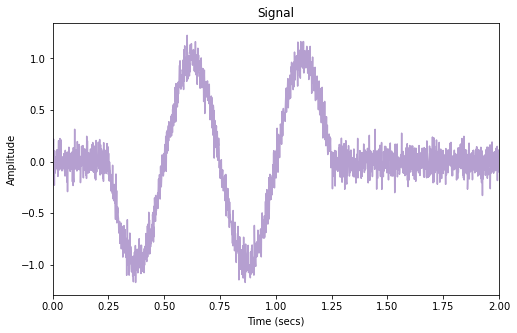

In [40]:
plotsignal(g= lambda t: noisysignal(t, lambda x: sinewave(x, f=2.0), tau = 0.25, T=1, sigma=0.1), tlim=(0,2))

Example with a gammatone:

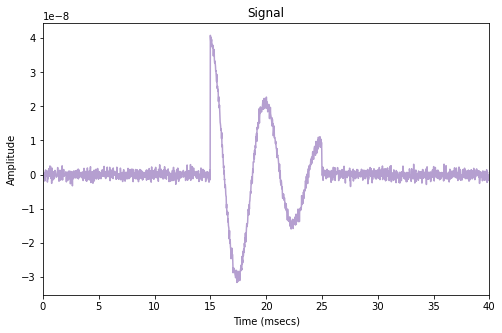

In [43]:
plotsignal(g= lambda t: noisysignal(t, lambda x: gammatone(x, f=200), tau = 0.015, T=0.010, sigma=10**-9), tlim=(0,0.04), tscale=10**3, tunits="msecs")

Example with a step:

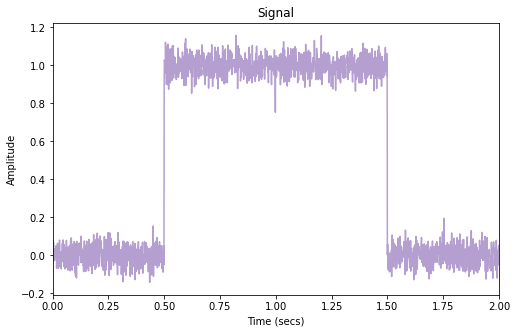

In [42]:
plotsignal(g= lambda t: noisysignal(t, lambda x: u(x), tau = 0.50, T=1, sigma=0.05), tlim=(0,2))

### 3c. Noise level specified by SNR

In [53]:
def snr2sigma(x, xrange=None, snr=10):
    if xrange == None:
        xrange = (0, len(x))
    Ps = power(x[xrange[0]:xrange[1]])
    sigma_s = math.sqrt(Ps)
    sigma_n = sigma_s/(10**(snr/20))
    return sigma_n

##### Calculating the signal $\sigma$ with consideration to the range of the signal

Sigma for 10dB SNR: 0.07071067811865475


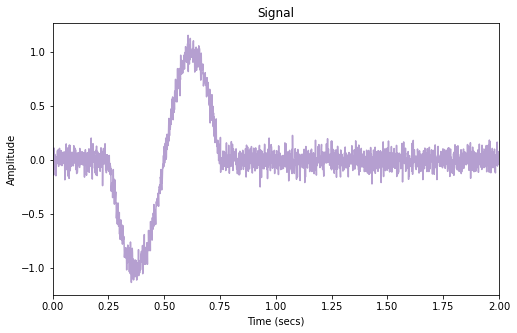

In [61]:
t = np.linspace(0,2,2001)
signal = gensignal(t, lambda t: sinewave(t, f=2.0), tau=0.25, T=0.5)
sigma_n = snr2sigma(signal, xrange=(250, 750), snr=20)
print("Sigma for 10dB SNR: " + str(sigma_n))
plotsignal(g= lambda t: noisysignal(t, lambda x: sinewave(x, f=2.0), tau = 0.25, T=0.5, sigma=sigma_n), tlim=(0,2))

##### Calculating the signal $\sigma$ *without* consideration to the range of the signal

Sigma for 10dB SNR: 0.035346503537745114


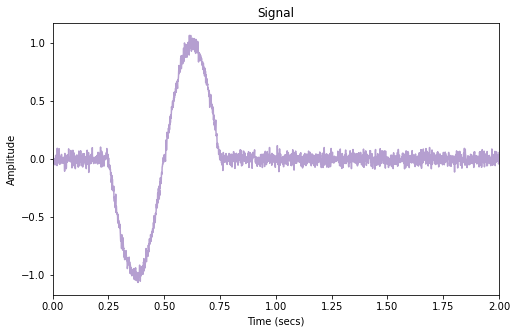

In [62]:
t = np.linspace(0,2,2001)
signal = gensignal(t, lambda t: sinewave(t, f=2.0), tau=0.25, T=0.5)
sigma_n = snr2sigma(signal, snr=20)
print("Sigma for 10dB SNR: " + str(sigma_n))
plotsignal(g= lambda t: noisysignal(t, lambda x: sinewave(x, f=2.0), tau = 0.25, T=0.5, sigma=sigma_n), tlim=(0,2))

The

### 3d. Estimating SNR

### 4. Grand synthesis